# Gate pulse generation 

### Ion excitation spectrum
![title](img/Spectrum.png)

### Phaser Hardware
![title](img/Phaser_HW.jpg)

### Hardware Block Diagram
![title](img/Gatepulse_Blockdiagram.png)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, constants

In [7]:
# Gate Pulse Parameters

M=1024  #fft block length


a_m=np.zeros(M,dtype=complex)
a_m[2]=M/4  #cosine at second freq (actually 3rd pos. freq coeff at 0 is DC)
a_m[-2]=M/4
a_m[100]=M/4  #cosine at 100th freq
a_m[-100]=M/4
#a_m[50]=1j*(M/4)  #sine at 50th freq
#a_m[-50]=1j*(M/4)


f_d=8     #tone spacing (interpolation factor)

t_pulse=4   #pulse length in fft blocks

f_c=10000   #carrier


Text(0.5, 1.0, 'STFT block in time domain')

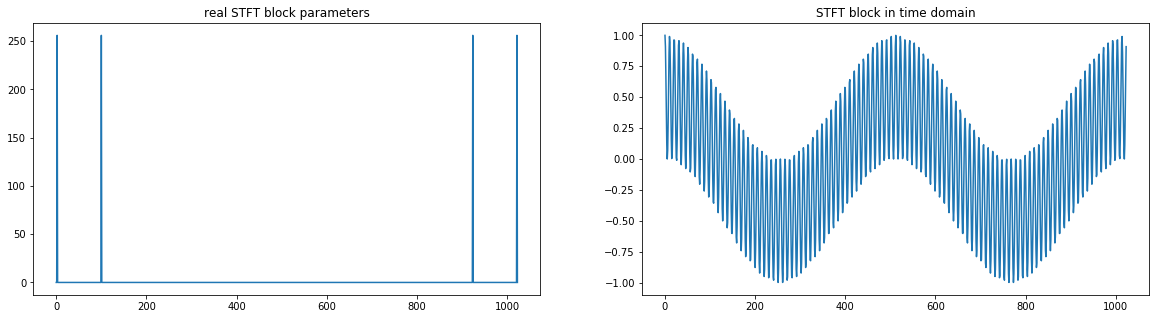

In [8]:
# show single STFT block
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(a_m.real)
ax[0].set_title('real STFT block parameters')
block=np.fft.ifft(a_m)
ax[1].plot(block.real)
ax[1].set_title('STFT block in time domain')

Text(0.5, 1.0, 'stitched time domain')

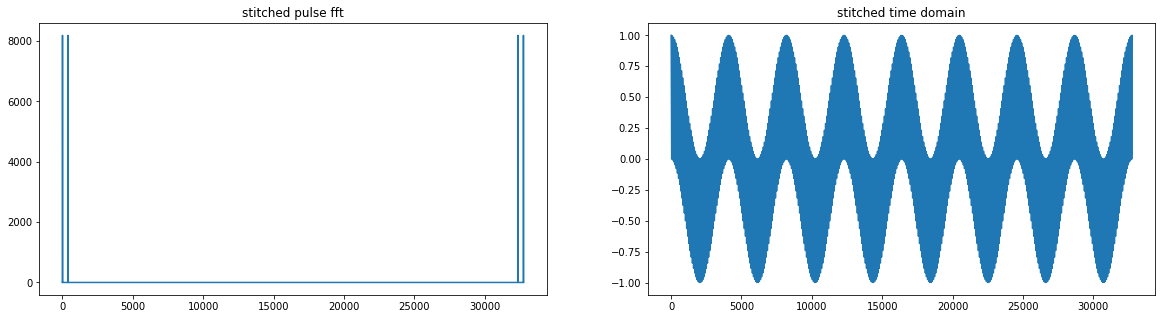

In [16]:
# zero padding as interpolation
a_m1=a_m[:512]*f_d
a_m2=a_m[513:]*f_d
a_m_pad=np.append(a_m1,np.zeros((f_d-1)*M))
a_m_pad=np.append(a_m_pad,a_m2)
block=np.fft.ifft(a_m_pad)

# block stitching for full pulse
pulse_BB=block   # pulse baseband
for i in range(t_pulse-1):
    pulse_BB=np.append(pulse_BB,block)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(np.fft.fft(pulse_BB).real)
ax[0].set_title('stitched pulse fft')
ax[1].plot(pulse_BB.real)
ax[1].set_title('stitched time domain')

Text(0.5, 1.0, 'modulated pulse')

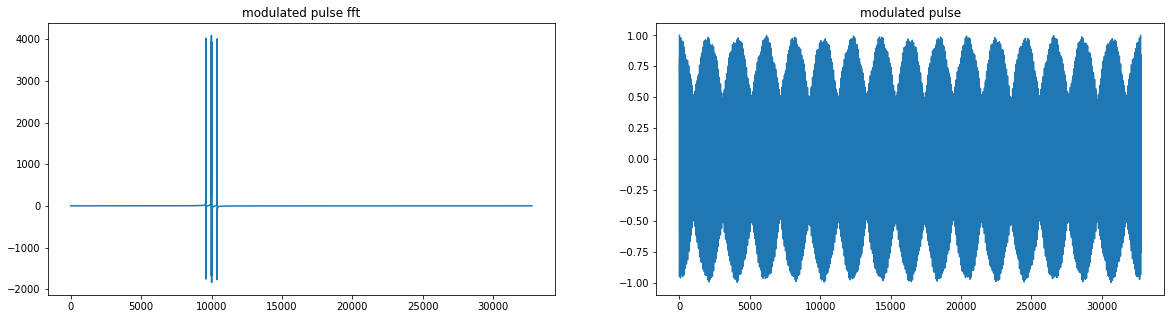

In [22]:
# generate carrier and modualte
carrier=np.linspace(0,1,pulse_BB.size)
carrier=np.exp(1j*2*np.pi*f_c*carrier)

modulated_pulse=pulse_BB*carrier
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(np.fft.fft(modulated_pulse).real)
ax[0].set_title('modulated pulse fft')
ax[1].plot(modulated_pulse.real)
ax[1].set_title('modulated pulse')


Text(0.5, 1.0, 'shaped pulse fft')

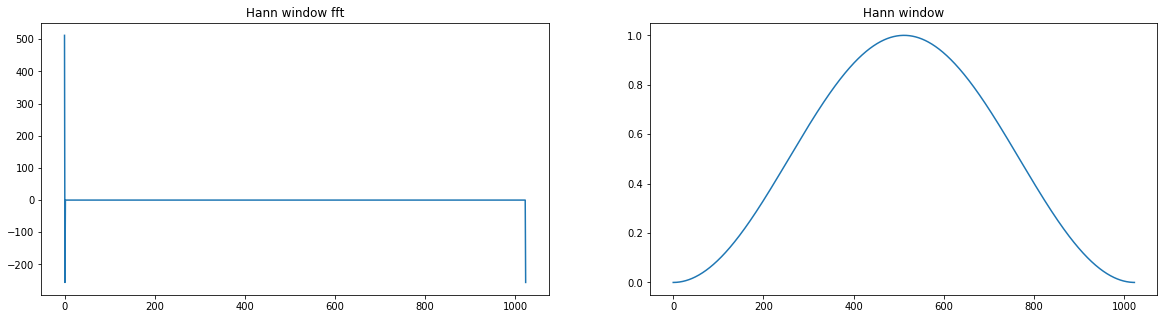

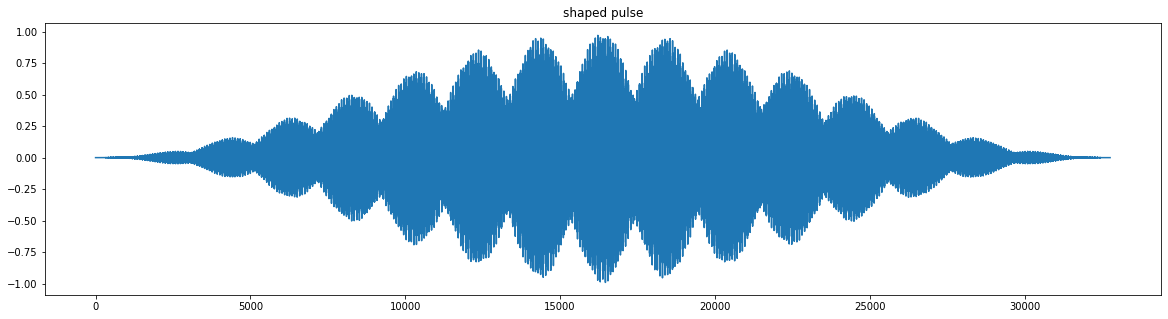

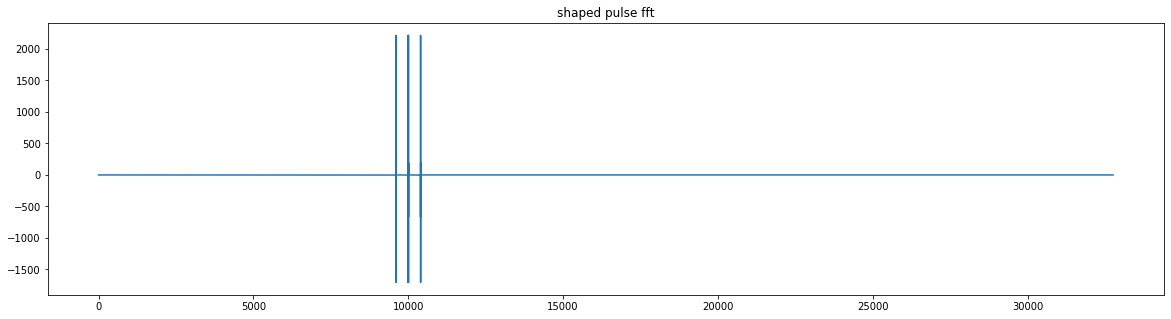

In [21]:
# generate Hann window
n=np.arange(0,M)
hann=0.5-0.5*np.cos(2*np.pi*n/M)  #also use fft block lenth M
hann_fft=np.fft.fft(hann)
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(hann_fft.real)
ax[0].set_title('Hann window fft')
ax[1].plot(hann)
ax[1].set_title('Hann window')

# interpolate
hann_fft1=hann_fft[:512]*f_d*t_pulse
hann_fft2=hann_fft[513:]*f_d*t_pulse
hann_fft_pad=np.append(hann_fft1,np.zeros((f_d*M*t_pulse)-M-(t_pulse-1)))
hann_fft_pad=np.append(hann_fft_pad,hann_fft2)
hann_pad=np.fft.ifft(hann_fft_pad)

# shape
pulse_shaped=modulated_pulse*hann_pad
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(pulse_shaped.real)
ax.set_title('shaped pulse')
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(np.fft.fft(pulse_shaped).real)
ax.set_title('shaped pulse fft')